In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error , mean_squared_log_error

data = pd.read_csv('C:\\Users\\Enes\\PycharmProjects\\PATIKA\\energy_dataset.csv')
df = data.copy()

In [2]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [3]:
df.drop(['time','generation fossil peat','generation geothermal','generation fossil oil shale','generation fossil coal-derived gas','generation hydro pumped storage aggregated','generation marine','generation wind offshore','forecast wind offshore eday ahead','price day ahead','total load forecast'],axis=1,inplace=True)
df.dropna(inplace=True)

In [4]:
x = df.drop(['price actual','total load actual'],axis=1).values
y = df.iloc[:,-2:].values

In [5]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33 , random_state = 15)

# Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)
pred = lr.predict(x_test)

In [7]:
print("R2 =",lr.score(x_test,y_test))
print("RMSE =" , mean_squared_error(y_test,pred))

R2 = 0.6406657687575639
RMSE = 906314.5715429133


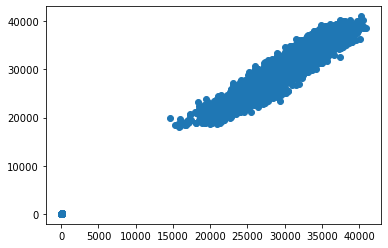

In [8]:
plt.scatter(pred,y_test)

# Polynomial Regression

In [12]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2) # derece yükselcikçe daha iyi sonuç veriyor
x_poly = poly_reg.fit_transform(x_test)
lin_reg = LinearRegression()
lin_reg.fit(x_poly,y_test)

pred = lin_reg.predict(x_poly)
print("R2 =",lin_reg.score(x_poly,y_test))
print("RMSE =" , mean_squared_error(y_test,pred))
print("RMSLE =" , mean_squared_log_error(y_test,pred))

R2 = 0.7224739865408945
RMSE = 657301.7987642157
RMSLE = 0.021851169227672256


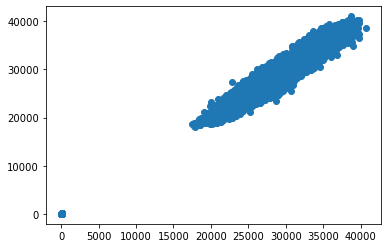

In [13]:
plt.scatter(pred,y_test)

# Random Forest

In [14]:
from sklearn.ensemble import RandomForestRegressor
r_rf = RandomForestRegressor(random_state=0 , n_estimators=10) # n_estimators kaçtane karar ağacı çizecegimizi belirler
r_rf.fit(x,y)
pred = r_rf.predict(x)

print("R2 =",r_rf.score(x,y))
print("RMSE =" , mean_squared_error(y,pred))
print("RMSLE =" , mean_squared_log_error(y,pred))


R2 = 0.9635867677712371
RMSE = 106324.6929815273
RMSLE = 0.0031190009055329015


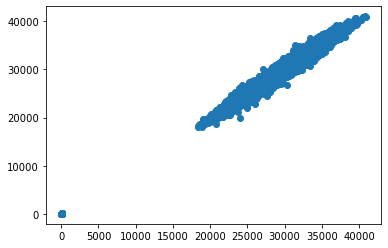

In [15]:
plt.scatter(pred,y)

# Decision Tree

R2 = 0.9635867677712371
RMSE = 0.0
RMSLE = 0.0


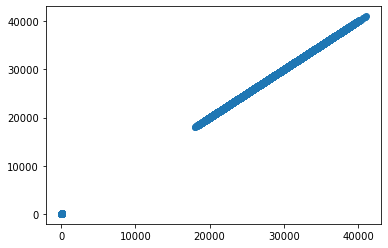

In [16]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state = 0)
r_dt.fit(x,y)
pred = r_dt.predict(x)

print("R2 =",r_rf.score(x,y))
print("RMSE =" , mean_squared_error(y,pred))
print("RMSLE =" , mean_squared_log_error(y,pred))

plt.scatter(y,pred)
